# 13. Коэффициенты корреляции.

Темпы роста ВВП России за $2006-2012$ в процентах (всего и на душу населения, $2005 -
100%$): $108.2, 117.4, 123.5, 113.9, 119.0, 124.1, 128.4, 108.5, 118.0, 124.2, 114.5, 119.6, 124.6, 128.7$.
Те же цифры для Украины: $107, 116, 118, 101, 105, 111, 111, 108, 117, 121, 103, 108, 114, 115$.
Проверить гипотезу о независимости данных выборок.

In [80]:
import numpy as np
from scipy.stats import norm
from scipy.stats import t
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
x = [108.2, 117.4, 123.5, 113.9, 119.0, 124.1, 128.4, 108.5, 118.0, 124.2, 114.5, 119.6, 124.6, 128.7]

In [45]:
y = [107, 116, 118, 101, 105, 111, 111, 108, 117, 121, 103, 108, 114, 115]

In [46]:
x_1 = np.zeros(len(x), dtype=int)
for num, i in enumerate(sorted(x)):
    x_1[x.index(i)] = int(num + 1)

In [47]:
x_1

array([ 1,  5,  9,  3,  7, 10, 13,  2,  6, 11,  4,  8, 12, 14])

In [48]:
y_1 = np.zeros(len(y), dtype=float)
prev = 0
for num, i in enumerate(sorted(y)):
    y_1[y.index(i)] = num + 1

In [50]:
y_1[5] = y_1[6] = 7.5

In [51]:
y_1[7] = y_1[11] = 5.5

In [52]:
y_1

array([  4. ,  11. ,  13. ,   1. ,   3. ,   7.5,   7.5,   5.5,  12. ,
        14. ,   2. ,   5.5,   9. ,  10. ])

In [53]:
S = 0
R = 0
for i in range(len(x)):
    for j in range(len(y)):
        if i < j:
            break
        if np.sign(x_1[i] - x_1[j]) * np.sign(y_1[i] - y_1[j]):
            S += 1
        else:
            R += 1

In [63]:
print('Кэндалл:', 2. / (len(x) * (len(x) - 1)) * (S - R))

Кэндалл: 0.8021978021978022


In [64]:
r_s = 1 - 6. / ((len(x)) ** 3 - len(x)) * sum((x_1 - y_1) ** 2)
n = len(x)

In [65]:
print('Спирмэн:', r_s)

Спирмэн: 0.538461538462


In [62]:
print('Поправленный коэффициент Спирмэна:', 0.5 * r_s * (np.sqrt(n - 1) + np.sqrt((n - 2) / (1 - r_s ** 2))))

Поправленный коэффициент Спирмэна: 2.07752252445


In [73]:
def z(alpha):
    return 0.5 * (t.ppf(alpha, n - 2) + norm.ppf(alpha))

In [78]:
print(z(0.02), z(1 - 0.02))

-2.17823529721 2.17823529721


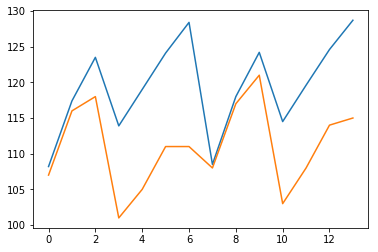

In [82]:
plt.plot(range(len(x)), x)
plt.plot(range(len(y)), y)

Из всего рассмотренного видно, что данные выборки зависимы.